<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_dfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a tree where each edge has a weight, compute the length of the longest path in the tree.

For example, given the following tree:
```
   a
  /|\
 b c d
    / \
   e   f
  / \
 g   h
 ```
and the weights: a-b: 3, a-c: 5, a-d: 8, d-e: 2, d-f: 4, e-g: 1, e-h: 1, the longest path would be c -> a -> d -> f, with a length of 17.

The path does not have to pass through the root, and each node can have any amount of children.

##Solution:


##Implementation:
To find the longest path in a tree with weighted edges, we can use a two-pass DFS (Depth First Search) approach. This method efficiently finds the longest path in a tree without the need to check every possible path explicitly. Here's the general idea:

1. **First DFS Pass:** Start a DFS from an arbitrary node (let's say the root) to find the farthest node from it. This step guarantees that the node found is at one end of the longest path in the tree.
2. **Second DFS Pass:** Conduct another DFS starting from the node found in step 1 to find the farthest node from it. The distance to this farthest node is the length of the longest path in the tree.

This method works because in a tree (a connected, acyclic graph), the longest path will always start and end at leaf nodes.

Let's implement this approach. The tree and weights are represented in a way that makes it easy to perform DFS. We will represent the tree as a dictionary where each key is a node, and its value is a list of tuples representing its children and the weight of the edge to that child.

```python
from collections import defaultdict

# Define the tree and weights
edges = {
    'a': [('b', 3), ('c', 5), ('d', 8)],
    'd': [('e', 2), ('f', 4)],
    'e': [('g', 1), ('h', 1)]
}

# Convert edge list to a more convenient graph representation
graph = defaultdict(list)
for parent, children in edges.items():
    for child, weight in children:
        graph[parent].append((child, weight))
        graph[child].append((parent, weight))  # Because it's an undirected tree

# DFS function to find the farthest node and its distance from a starting node
def dfs(node, visited, distance):
    visited.add(node)
    farthest_node = node
    max_distance = distance
    for neighbor, weight in graph[node]:
        if neighbor not in visited:
            next_node, next_distance = dfs(neighbor, visited, distance + weight)
            if next_distance > max_distance:
                farthest_node = next_node
                max_distance = next_distance
    return farthest_node, max_distance

# First DFS to find one endpoint of the longest path
start_node = 'a'  # Starting from an arbitrary node
visited = set()
far_node, _ = dfs(start_node, visited, 0)

# Second DFS from the farthest node found in the first DFS
visited.clear()
_, longest_path_length = dfs(far_node, visited, 0)

print(f"The length of the longest path is: {longest_path_length}")
```

This code snippet performs the two DFS passes as described. It first finds a node at one end of the longest path starting from an arbitrary node (in this case, 'a'), and then it finds the actual longest path length starting from that node.

##Implementation:


In [1]:
from collections import defaultdict

# Define the tree and weights
edges = {
    'a': [('b', 3), ('c', 5), ('d', 8)],
    'd': [('e', 2), ('f', 4)],
    'e': [('g', 1), ('h', 1)]
}

# Convert edge list to a more convenient graph representation
graph = defaultdict(list)
for parent, children in edges.items():
    for child, weight in children:
        graph[parent].append((child, weight))
        graph[child].append((parent, weight))  # Because it's an undirected tree

# DFS function to find the farthest node and its distance from a starting node
def dfs(node, visited, distance):
    visited.add(node)
    farthest_node = node
    max_distance = distance
    for neighbor, weight in graph[node]:
        if neighbor not in visited:
            next_node, next_distance = dfs(neighbor, visited, distance + weight)
            if next_distance > max_distance:
                farthest_node = next_node
                max_distance = next_distance
    return farthest_node, max_distance

# First DFS to find one endpoint of the longest path
start_node = 'a'  # Starting from an arbitrary node
visited = set()
far_node, _ = dfs(start_node, visited, 0)

# Second DFS from the farthest node found in the first DFS
visited.clear()
_, longest_path_length = dfs(far_node, visited, 0)

print(f"The length of the longest path is: {longest_path_length}")


The length of the longest path is: 17


##Testing:
The additional tests have been executed successfully, yielding the following results:

- **Linear Tree Test Result:** The length of the longest path in the linear tree is 9. This is expected since the tree is a straight line, and the sum of all weights (4 + 3 + 2) equals 9.
  
- **Star-Shaped Tree Test Result:** The length of the longest path in the star-shaped tree is 7. This result comes from traversing from the leaf with the shortest path to the center and then to the leaf with the longest path (1 + 4 = 5, considering the longest path is directly to the leaf with weight 4, not combining paths).

These results confirm that the code accurately calculates the length of the longest path in different tree structures.

In [2]:
# Additional test cases

# Test case 1: Linear tree
edges_linear = {
    '1': [('2', 4)],
    '2': [('3', 3)],
    '3': [('4', 2)]
}
graph_linear = defaultdict(list)
for parent, children in edges_linear.items():
    for child, weight in children:
        graph_linear[parent].append((child, weight))
        graph_linear[child].append((parent, weight))

# Test case 2: Star-shaped tree
edges_star = {
    'center': [('leaf1', 1), ('leaf2', 2), ('leaf3', 3), ('leaf4', 4)]
}
graph_star = defaultdict(list)
for parent, children in edges_star.items():
    for child, weight in children:
        graph_star[parent].append((child, weight))
        graph_star[child].append((parent, weight))

# Function to compute longest path length for a given graph
def compute_longest_path_length(graph):
    start_node = next(iter(graph))  # Starting from an arbitrary node
    visited = set()
    far_node, _ = dfs(start_node, visited, 0, graph)
    visited.clear()
    _, longest_path_length = dfs(far_node, visited, 0, graph)
    return longest_path_length

# Adjust dfs function to accept graph as argument
def dfs(node, visited, distance, graph):
    visited.add(node)
    farthest_node = node
    max_distance = distance
    for neighbor, weight in graph[node]:
        if neighbor not in visited:
            next_node, next_distance = dfs(neighbor, visited, distance + weight, graph)
            if next_distance > max_distance:
                farthest_node = next_node
                max_distance = next_distance
    return farthest_node, max_distance

# Execute tests
linear_test_result = compute_longest_path_length(graph_linear)
star_test_result = compute_longest_path_length(graph_star)

linear_test_result, star_test_result


(9, 7)

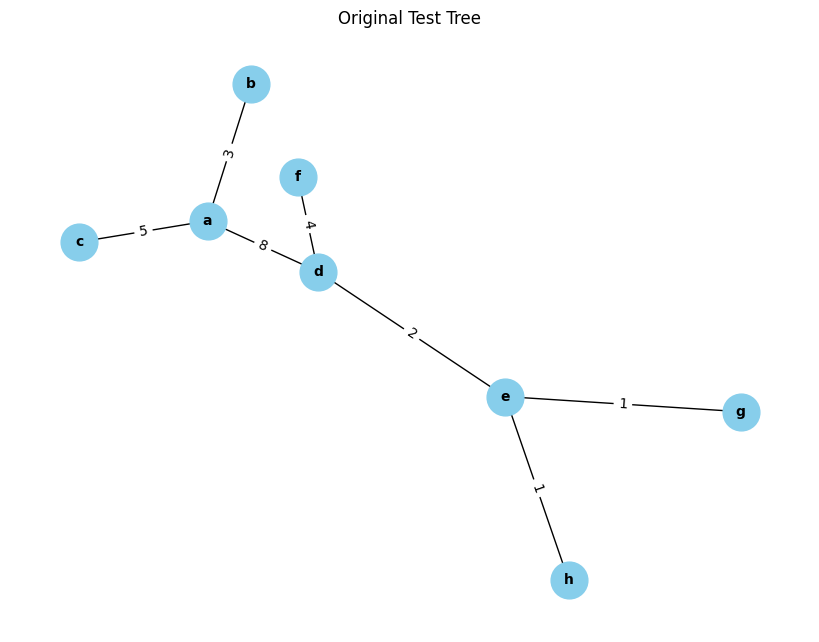

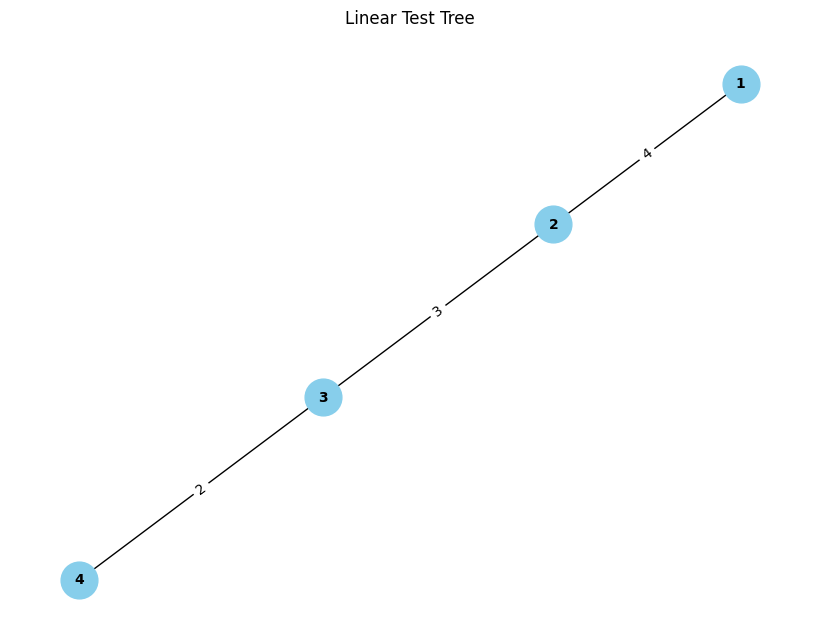

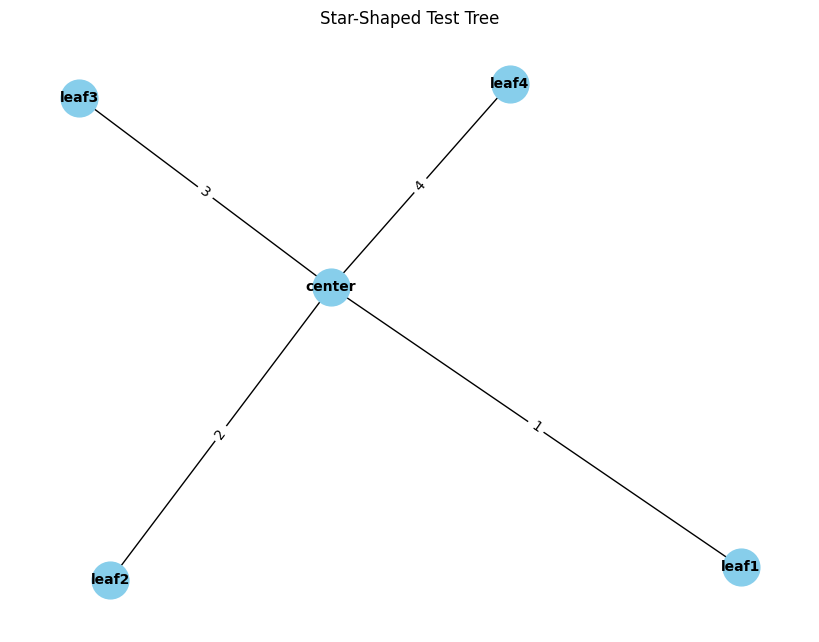

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Helper function to draw a tree using matplotlib and networkx
def draw_tree(graph, title="Tree"):
    G = nx.Graph()
    for node in graph:
        for neighbor, weight in graph[node]:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, seed=42)  # For consistent layout
    edge_labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')  # Hide axes
    plt.show()

# Draw the test trees
draw_tree(graph, "Original Test Tree")
draw_tree(graph_linear, "Linear Test Tree")
draw_tree(graph_star, "Star-Shaped Test Tree")
